<a href="https://colab.research.google.com/github/NayeliZuniga/Simulacion1/blob/main/5_4_Flecha_y_cojinete__Metodolog%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

## Ejemplo

Una flecha será ensamblada en un cojinete como se muestra a continuación:

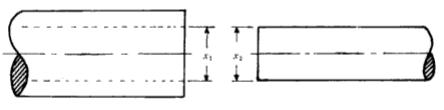

Si $X_1$, sigue una distribución normal con media 1.5 y varianza 0.0016, y $X_2$ sigue esta misma distribución con media 1.48 y varianza 0.0009, determine:
* La probabilidad de que haya interferencia
* El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de si valor verdadero en menos de 0.01, con un nivel de seguridad del 95%

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

$
N(\mu,\sigma)\\
X_1\sim N(1.5,0.04)\\
X_2\sim N(1.48,0.03)
$

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

$
X_1\sim f(x)=\frac{1}{\sqrt{2\pi}(0.04)}e^{\frac{-(x-1.5)^2}{2(0.0016)}}\\
X_2\sim f(x)=\frac{1}{\sqrt{2\pi}(0.03)}e^{\frac{-(x-1.48)^2}{2(0.0009)}}\\
$

### 3. Modele las variables aleatorias

Construya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

In [ ]:
#Tenemos 3 métodos, por las ventajas que se tienen procedemos por
#Box-Müller

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def aceptacion(n):
 lista=[]
 for _ in range(n):
  U_1=rd.random()
  U_2=rd.random()
  R= np.sqrt((-2)*np.log(U_1))
  theta=2*np.pi*U_2
  lista.append(R*np.cos(theta))
  lista.append(R*np.sin(theta))
 return lista

In [ ]:
exp=aceptacion(5000)

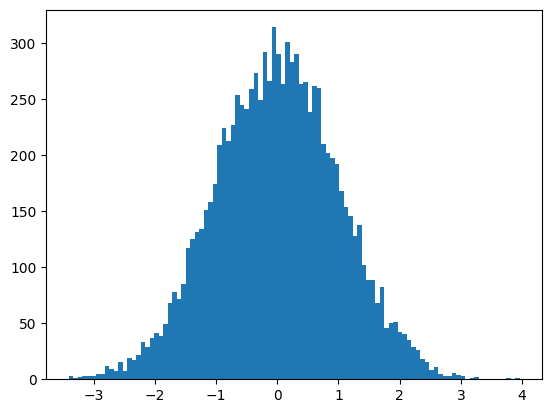

In [ ]:
plt.hist(exp, bins=100)
plt.show()

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

* Condición de interferencia:
$X_2\geq X_1$
* Buscamos:$P(X_2\geq X_1)$

___
Cambio a la parte computacional

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

* Experimento: Generar dos numeros aleatorios y compararlos.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#Generar dos numeros aleatorios y compararlos.
x1=np.random.normal(1.5,0.04,1)
x2=np.random.normal(1.48,0.03,1)
if x1<=x2:
  print("Éxito")
else:
  print("Fracaso")

Éxito


### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

In [ ]:
#Generar n pares de numeros aleatorios y compararlos
def experimento(n):
    inter=0
    for _ in range(n):
        x1=np.random.normal(1.5,0.04,1)
        x2=np.random.normal(1.48,0.03,1)
        if x1<=x2:
            inter += 1
    return inter/n

Grafica de convergencia, fluctúa y tiende a un valor. Que va a ser la probabilidad que estamos buscando

### 7. Gráfica de estabilización
Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [ ]:
def muestra(m):
 lista=[]
 for i in range(m):
  e=experimento (10)
  lista.append(e)
 return lista

In [ ]:
m=muestra(1000)

In [ ]:
np.mean(m)

np.float64(0.3479)

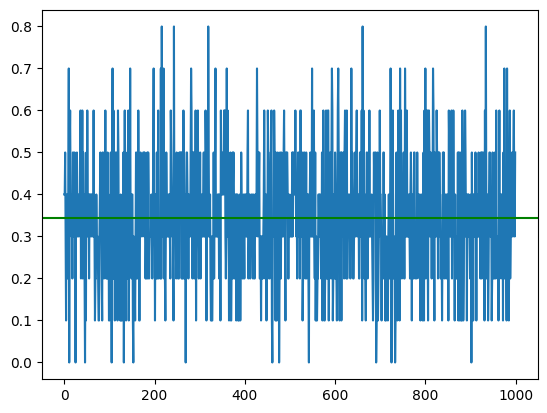

In [ ]:
plt.plot(m)
plt.axhline(y=np.mean(m), color="green")
plt.show()

### 8. Replique el modelo.

In [ ]:
def simulacion(z):
    lista=[]
    for _ in range(z):
        lista.append(muestra(1000))
    return lista

In [ ]:
sim=simulacion(1000)
#mínimo 30 para poder hacer estadística

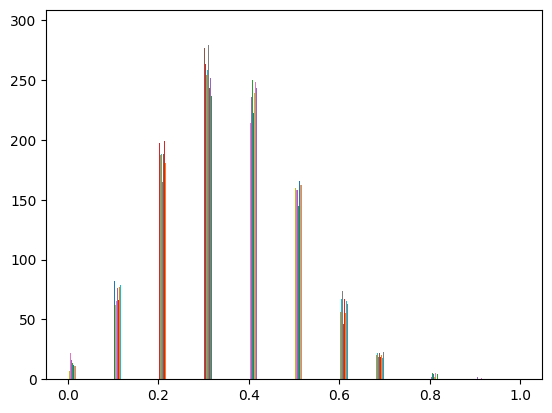

In [ ]:
plt.hist(sim, bins=50)
plt.show()

### 9. Probabilidad
 Calcule la probabilidad de que haya interferencia

In [ ]:
print(f"Media: {np.mean(sim)}, Varianza: {np.var(sim)}, Desviacion estandar: {np.std(sim)}")

Media: 0.34466870000000005, Varianza: 0.02261901724030999, Desviacion estandar: 0.15039620088389863


### 10. Intervalo de confianza
Halle el intervalo de confianza de la probabilidad de que haya una interferencia con un nivel de confianza del $95 \%$.

In [ ]:
intervalo = [np.mean(sim)-1.96*np.std(sim),
             np.mean(sim)+1.96*np.std(sim)]
print(intervalo)

[np.float64(0.049892146267558724), np.float64(0.6394452537324413)]
